# What is this Notebook about

In this notebook explain and demonstrate Tracking the Covid-19 pandemic collaboratively and setup Impacted, Recovery and Testing sites possibilities !!

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [4]:
# Define the Data set URL
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [13]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df['state']=df['state'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9729 entries, 0 to 9728
Data columns (total 53 columns):
date                           9729 non-null datetime64[ns]
state                          9729 non-null object
positive                       9690 non-null float64
negative                       9549 non-null float64
pending                        1170 non-null float64
hospitalizedCurrently          7048 non-null float64
hospitalizedCumulative         5370 non-null float64
inIcuCurrently                 3772 non-null float64
inIcuCumulative                1485 non-null float64
onVentilatorCurrently          3249 non-null float64
onVentilatorCumulative         526 non-null float64
recovered                      6326 non-null float64
dataQualityGrade               8604 non-null object
lastUpdateEt                   9362 non-null object
dateModified                   9362 non-null object
checkTimeEt                    9362 non-null object
death                          9037 non-null

In [14]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-08-25,AK,5666.0,328165.0,NaN,46.0,NaN,NaN,NaN,6.0,...,333831,4,0,bd407e9ed01cce1ea303fe93d06cd759e6488332,0,0,0,0,0,NaN
1,2020-08-25,AL,117242.0,810035.0,NaN,1097.0,13793.0,NaN,1399.0,NaN,...,927277,13,0,4945c5836682d749c8ab2609d9b6dce0b72b60ce,0,0,0,0,0,NaN
2,2020-08-25,AR,57374.0,616810.0,NaN,442.0,4013.0,NaN,NaN,108.0,...,674184,15,51,803f6524a9f20c7d7f691136319ff875adac2d76,0,0,0,0,0,NaN
3,2020-08-25,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,e762458f6ad93db951259394cf32880309d5dfc4,0,0,0,0,0,NaN
4,2020-08-25,AZ,199273.0,962931.0,NaN,999.0,21365.0,319.0,NaN,168.0,...,1162204,21,146,df43531eadb8a5893d2c552b4285f1b00e483345,0,0,0,0,0,NaN


In [59]:
def plot_var(var='positiveIncrease',
             state='MI'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

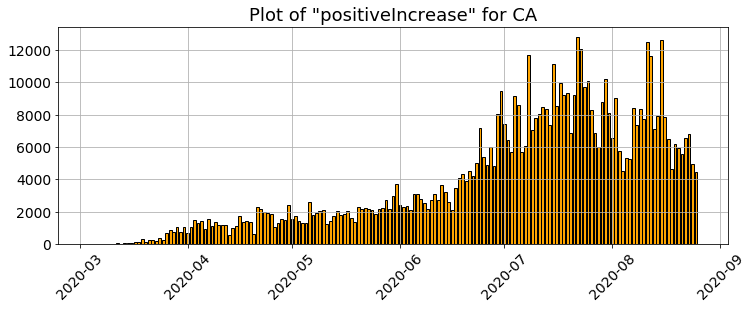

In [162]:
plot_var('positiveIncrease','CA')

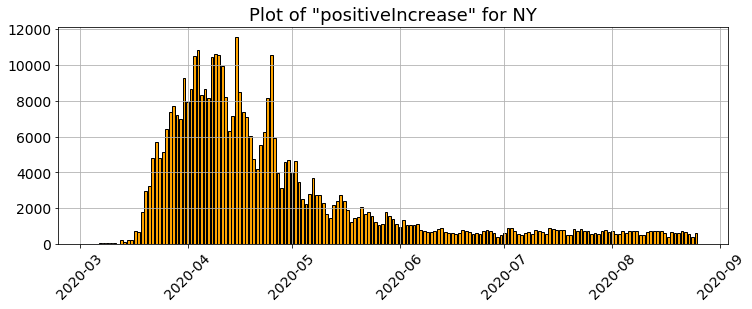

In [163]:
plot_var('positiveIncrease','NY')

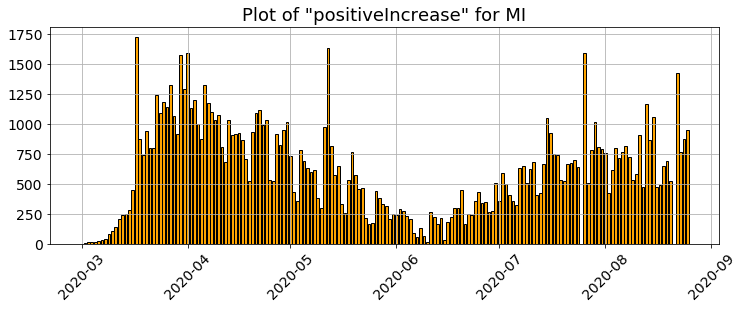

In [165]:
plot_var('positiveIncrease','MI')

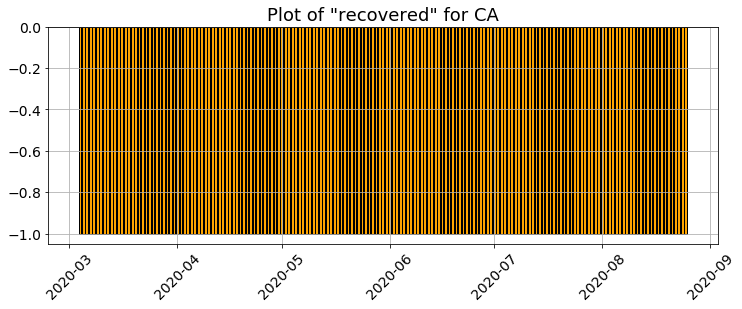

In [170]:
plot_var('recovered','CA')

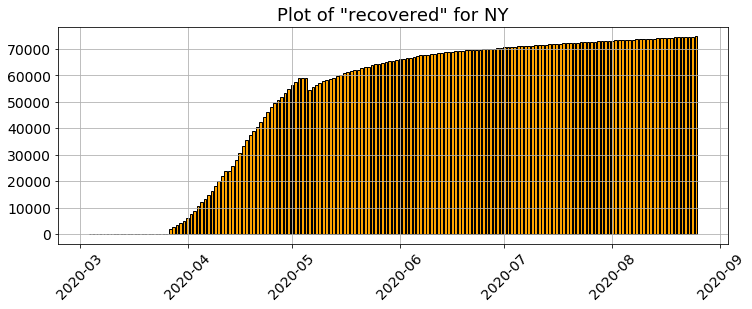

In [171]:
plot_var('recovered','NY')

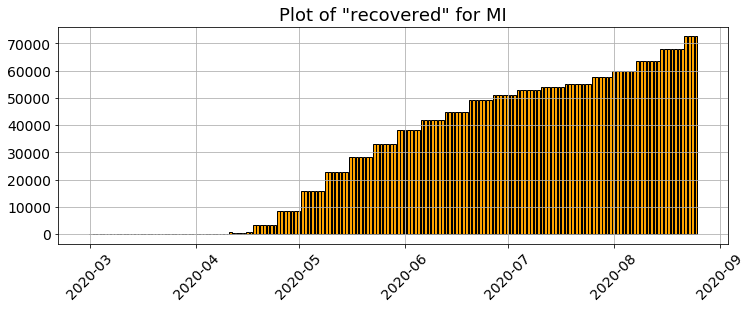

In [172]:
plot_var('recovered','MI')

In [ ]:
plot_var('recovered','MI')

In [64]:
#scatter plot of two variables for a given state
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='MI'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

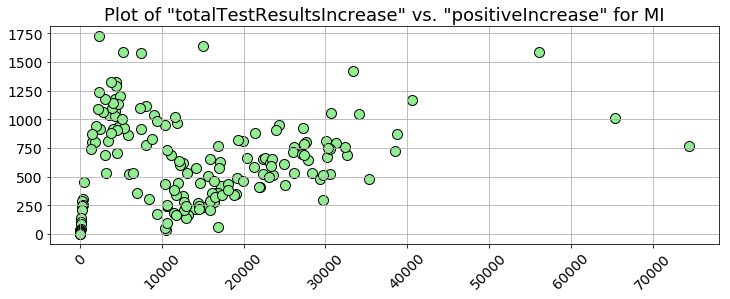

In [65]:
plot_xy(state='MI')

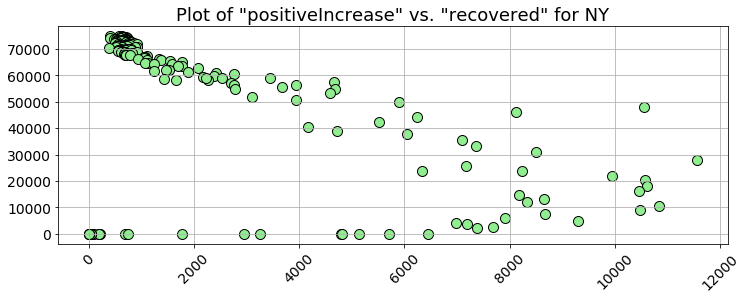

In [173]:
plot_xy('positiveIncrease','recovered','NY')

In [174]:
plot_xy('positiveIncrease','recovered','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [73]:
#track the spread of the virus
def plotStateSpread(lst_states=['MI','CA','NY']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

In [77]:
#track the spread of the virus
def plotStateSpreadRecovered(lst_states=['MI','CA','NY']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total Recovered results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['recovered'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" Recovered" + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("recovered",fontsize=16)
    plt.show()

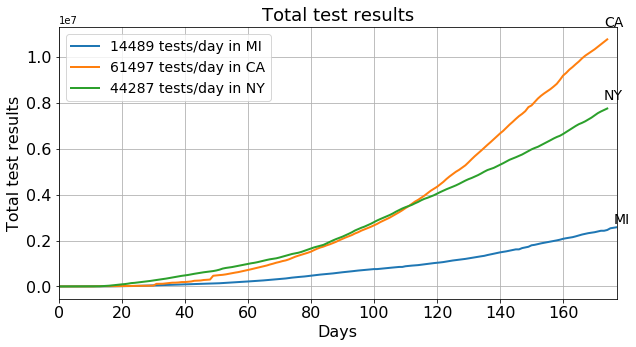

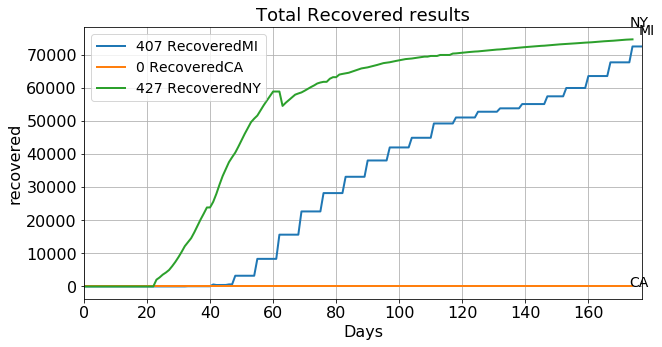

In [78]:
plotStateSpread()
plotStateSpreadRecovered()

In [80]:
def fatality_ratio(state='MI'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [81]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

In [89]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

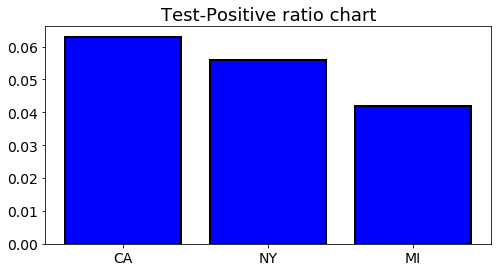

In [95]:
states = ['CA','NY','MI']
tp,x = [],[]
for s in states:
    data= positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-Positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

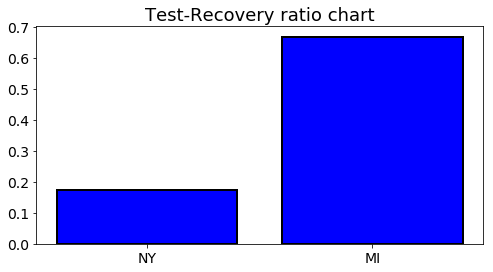

In [96]:
states = ['CA','NY','MI']
tp,x = [],[]
for s in states:
    data =recovery_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-Recovery ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

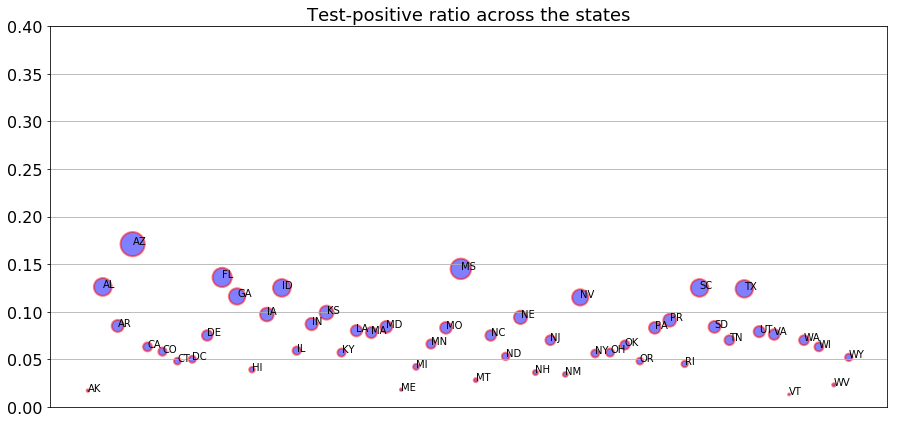

In [102]:
# Test Positive across the state
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=18)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.4)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [135]:
#Which states have 14 days of decreasing case counts?
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

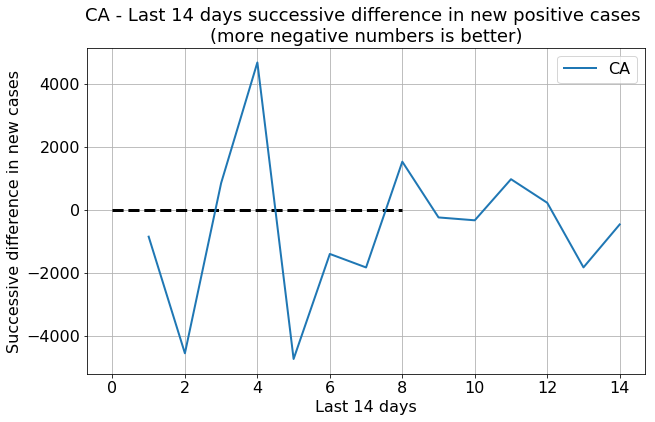

In [138]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("CA - Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()

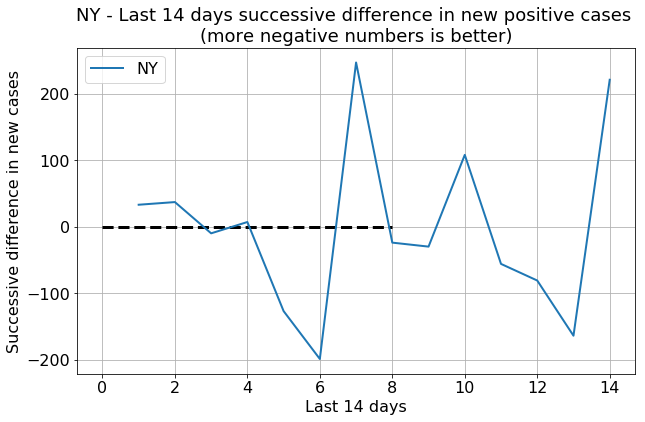

In [141]:
states = ['NY']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("NY - Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()

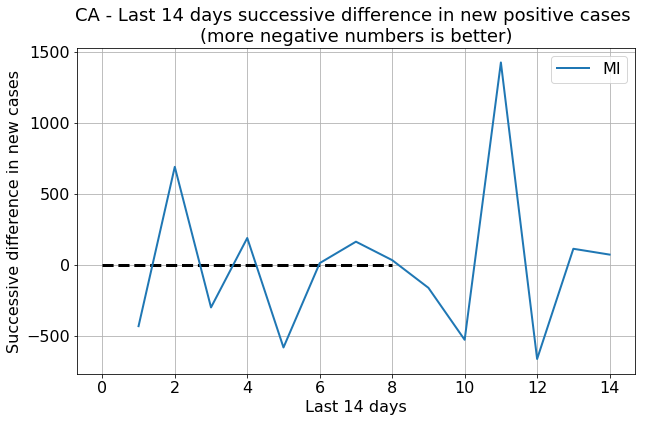

In [143]:
states = ['MI']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("CA - Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()

In [144]:
#Which states have 14 days of decreasing case counts?
def caseCountsdecreaserecovered(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['recovered'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

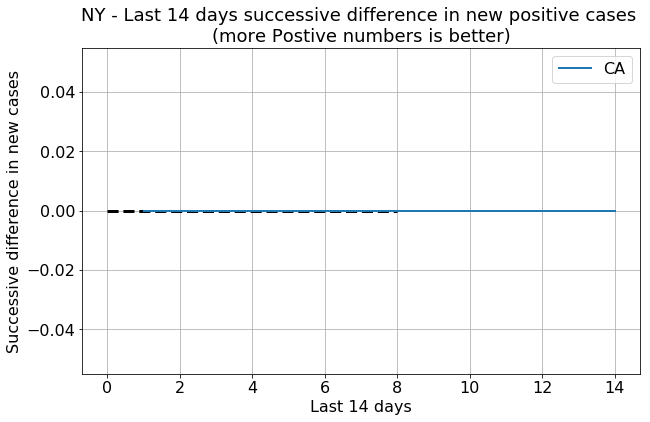

In [151]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("NY - Last 14 days successive difference in new positive cases \n(more Postive numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecreaserecovered(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()

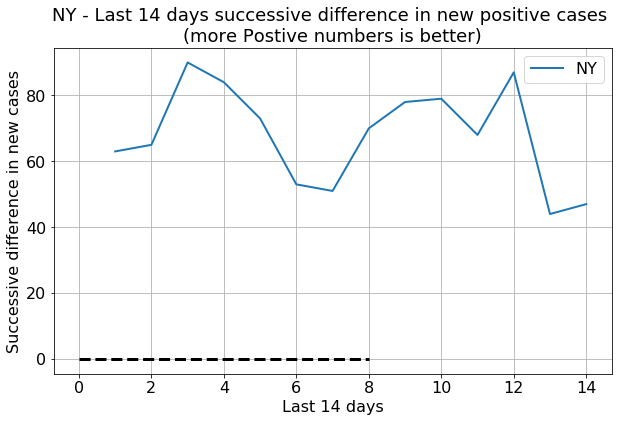

In [150]:
states = ['NY']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("NY - Last 14 days successive difference in new positive cases \n(more Postive numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecreaserecovered(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()

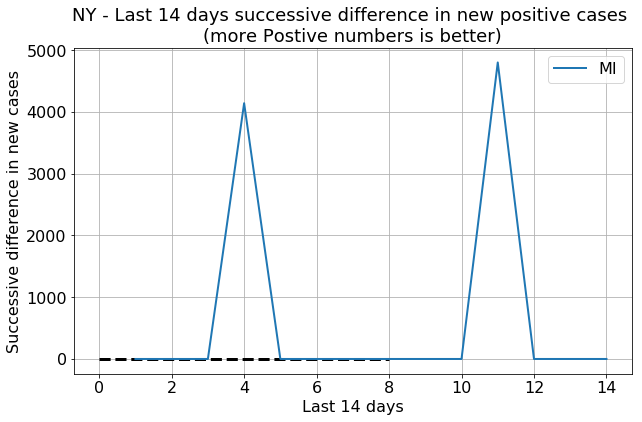

In [152]:
states = ['MI']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("NY - Last 14 days successive difference in new positive cases \n(more Postive numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecreaserecovered(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=8,linestyles='--',lw=3)
plt.show()